In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv("planetary-data.csv")

In [81]:
data

,Planet,"Radius, r (m)",Unnamed: 2,Unnamed: 3,"Surface field strength, g (N kg^-1)",Unnamed: 5,Unnamed: 6,"Mass, M (kg)"
0,Mercury,2400000.0,2430000.0,2440000.0,3.76,3.74,3.78,3.300000e+23
1,Venus,6040000.0,6110000.0,6110000.0,8.73,8.80,8.79,4.870000e+24
2,Earth,6360000.0,6400000.0,6390000.0,9.85,9.78,9.81,5.980000e+24
3,Mars,3410000.0,3350000.0,3380000.0,3.81,3.79,3.79,6.420000e+23
4,Jupiter,71300000.0,71400000.0,71400000.0,24.95,24.92,24.83,1.900000e+27
5,Saturn,61000000.0,60000000.0,60200000.0,10.40,10.38,10.41,5.670000e+26


In [82]:
data.rename(columns={"Unnamed: 2": "Radius 2, r (m)",
                     "Unnamed: 3": "Radius 3, r (m)",
                     "Unnamed: 5": "Surface field strength 2, g (N kg^-1)",
                     "Unnamed: 6": "Surface field strength 3, g (N kg^-1)"},
            inplace=True)

In [83]:
data

,Planet,"Radius, r (m)","Radius 2, r (m)","Radius 3, r (m)","Surface field strength, g (N kg^-1)","Surface field strength 2, g (N kg^-1)","Surface field strength 3, g (N kg^-1)","Mass, M (kg)"
0,Mercury,2400000.0,2430000.0,2440000.0,3.76,3.74,3.78,3.300000e+23
1,Venus,6040000.0,6110000.0,6110000.0,8.73,8.80,8.79,4.870000e+24
2,Earth,6360000.0,6400000.0,6390000.0,9.85,9.78,9.81,5.980000e+24
3,Mars,3410000.0,3350000.0,3380000.0,3.81,3.79,3.79,6.420000e+23
4,Jupiter,71300000.0,71400000.0,71400000.0,24.95,24.92,24.83,1.900000e+27
5,Saturn,61000000.0,60000000.0,60200000.0,10.40,10.38,10.41,5.670000e+26


In [84]:
mean_data = data

In [85]:
mean_data["Mean radius, r (m)"] = (data["Radius, r (m)"] + data["Radius 2, r (m)"] + data["Radius 3, r (m)"]) / 3

In [86]:
mean_data["Mean surface field strength, g (N kg^-1)"] = (data["Surface field strength, g (N kg^-1)"] + data["Surface field strength 2, g (N kg^-1)"] + data["Surface field strength 3, g (N kg^-1)"]) / 3

In [87]:
mean_data.drop(labels=["Radius, r (m)", "Radius 2, r (m)", "Radius 3, r (m)"], axis=1, inplace=True)
mean_data.drop(labels=["Surface field strength, g (N kg^-1)", "Surface field strength 2, g (N kg^-1)", "Surface field strength 3, g (N kg^-1)"], axis=1, inplace=True)

In [88]:
mean_data

,Planet,"Mass, M (kg)","Mean radius, r (m)","Mean surface field strength, g (N kg^-1)"
0,Mercury,3.300000e+23,2.423333e+06,3.760000
1,Venus,4.870000e+24,6.086667e+06,8.773333
2,Earth,5.980000e+24,6.383333e+06,9.813333
3,Mars,6.420000e+23,3.380000e+06,3.796667
4,Jupiter,1.900000e+27,7.136667e+07,24.900000
5,Saturn,5.670000e+26,6.040000e+07,10.396667


In [89]:
def calc_G_const(m, g, r):
    G_const = (g * r ** 2) / m
    return G_const

In [90]:
mean_data["G (N m^2 kg^-2)"] = calc_G_const(mean_data["Mass, M (kg)"], mean_data["Mean surface field strength, g (N kg^-1)"], mean_data["Mean radius, r (m)"])

In [91]:
mean_data

,Planet,"Mass, M (kg)","Mean radius, r (m)","Mean surface field strength, g (N kg^-1)",G (N m^2 kg^-2)
0,Mercury,3.300000e+23,2.423333e+06,3.760000,6.691142e-11
1,Venus,4.870000e+24,6.086667e+06,8.773333,6.674131e-11
2,Earth,5.980000e+24,6.383333e+06,9.813333,6.686678e-11
3,Mars,6.420000e+23,3.380000e+06,3.796667,6.756174e-11
4,Jupiter,1.900000e+27,7.136667e+07,24.900000,6.674774e-11
5,Saturn,5.670000e+26,6.040000e+07,10.396667,6.689366e-11


In [92]:
mean_G = mean_data["G (N m^2 kg^-2)"].mean()

In [93]:
mean_G

6.69537738629892e-11

In [94]:
G = 6.67 * 10 ** -11

In [97]:
percent_diff = (mean_G - G) / G * 100
percent_diff

0.38047055920419187

## Percentage difference of G = 0.38%

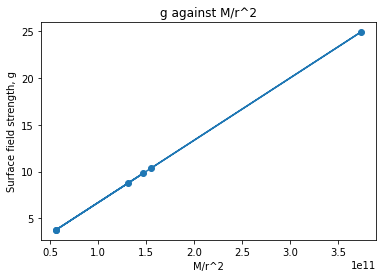

In [127]:
fig, ax = plt.subplots()

x_vals = mean_data["Mass, M (kg)"] / mean_data["Mean radius, r (m)"] ** 2  # M/R^2
y_vals = mean_data["Mean surface field strength, g (N kg^-1)"]  # g

ax.scatter(x=x_vals,
           y=y_vals)

grad, y_intercept = np.polyfit(x_vals, y_vals, 1)

ax.plot(x_vals, grad * x_vals + y_intercept)

ax.set(xlabel="M/r^2",
       ylabel="Surface field strength, g",
       title="g against M/r^2");

In [112]:
grad

6.666836948014889e-11

In [115]:
# Difference between gradient and mean value of G
grad_mean_G_diff = mean_G - grad
grad_mean_G_diff

2.8540438284030913e-13

In [116]:
# Percentage difference between gradient and mean value of G
grad_mean_G_diff / mean_G * 100

0.42627079307634874

In [117]:
# Difference between gradient and accepted value of G
grad_G_diff = G - grad
grad_G_diff

3.163051985111314e-14

In [118]:
# Percentage difference between gradient and accepted value of G
grad_G_diff / G * 100

0.04742206874229856

In [123]:
print(f"Mean G = {mean_G}, gradient = {grad}, accepted G = {G}")

Mean G = 6.69537738629892e-11, gradient = 6.666836948014889e-11, accepted G = 6.67e-11
